# 1) Import the libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


# data analysis libraries 
import numpy as np
import pandas as pd

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# machine learning libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 2) Explore the dataset

In [2]:
df = pd.read_csv('dataset/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.describe()   # statistical summary of dataframe

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.info() # description of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()       # Any null values in a dataframe 

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.shape

(200, 4)

# 3) Data Visualization 

<AxesSubplot:>

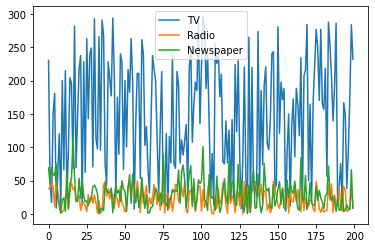

In [7]:
#plt.figure(figsize=(10, 10))
df[['TV', 'Radio', 'Newspaper']].plot()


In [8]:
# plot shows that TV has greater number of counts than Radio and Newspaper

<AxesSubplot:>

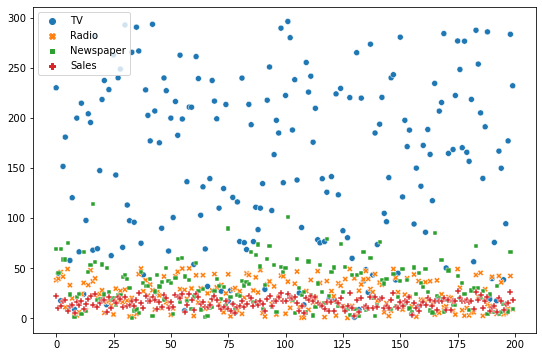

In [9]:
# scatterplot shows the dataframe in other dimensions
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df)

Text(0.5, 1.0, 'Relationship between TV and Sales')

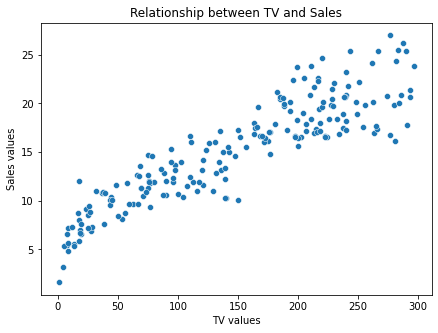

In [10]:
plt.figure(figsize=(7,5))
sns.scatterplot(x = 'TV', y = 'Sales', data=df )
plt.xlabel('TV values')
plt.ylabel('Sales values')
plt.title('Relationship between TV and Sales')

Text(0.5, 1.0, 'Relationship between Radio and Sales')

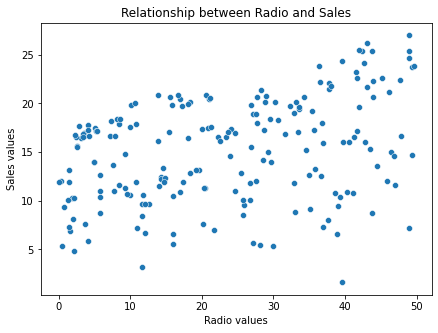

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(x = 'Radio', y = 'Sales', data=df )
plt.xlabel('Radio values')
plt.ylabel('Sales values')
plt.title('Relationship between Radio and Sales')

Text(0.5, 1.0, 'Relationship between Newspaper and Sales')

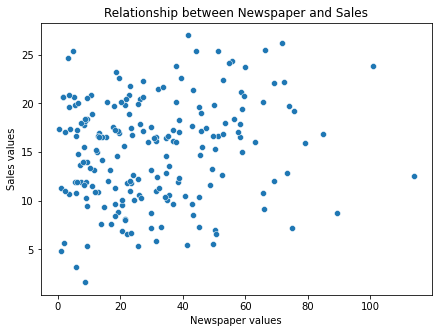

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(x = 'Newspaper', y = 'Sales', data=df )
plt.xlabel('Newspaper values')
plt.ylabel('Sales values')
plt.title('Relationship between Newspaper and Sales')

In [13]:
# Adding a best line fit

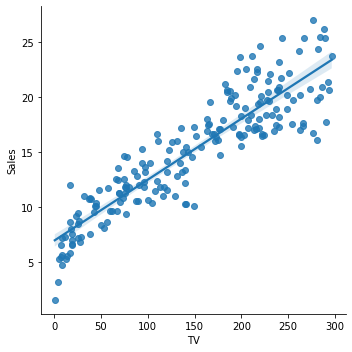

In [14]:
# Correlated plot shows that relationship between Tv and Sales
sns.lmplot(x = 'TV', y = 'Sales', data=df)

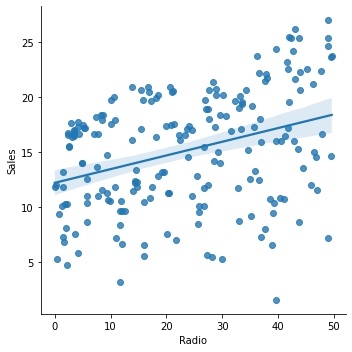

In [15]:
sns.lmplot(x = 'Radio', y = 'Sales', data=df)

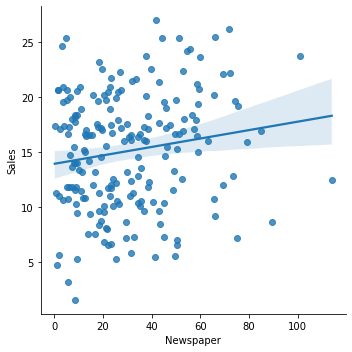

In [16]:
sns.lmplot(x = 'Newspaper', y = 'Sales', data=df)

In [17]:
# In the above plots, a best line fit tells about the correlation relationship between Sales and other features

In [18]:
correlation_matrix = df.corr()
correlation_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

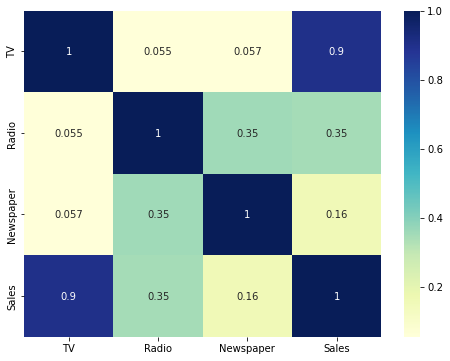

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot = True, cmap="YlGnBu")

Text(0, 0.5, 'Count')

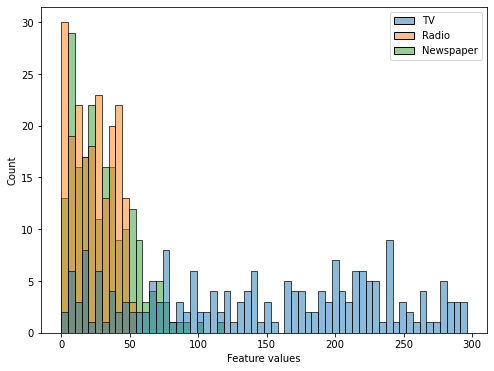

In [20]:
# Histogram plot
plt.figure(figsize=(8,6))
sns.histplot(df[['TV', 'Radio', 'Newspaper']], bins=60)
plt.xlabel('Feature values')
plt.ylabel('Count')
#plt.title('Plot shows value of features')

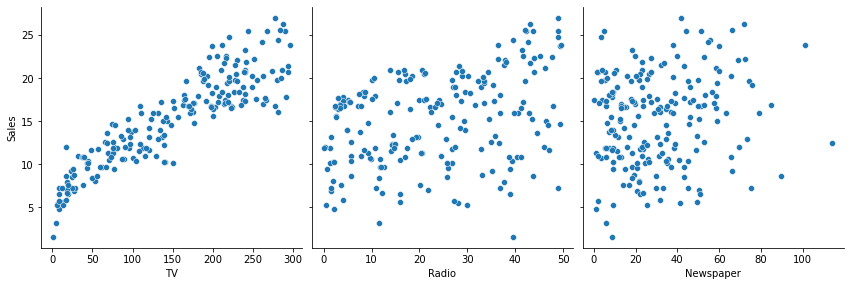

In [21]:
# Pairplot 
sns.pairplot(df, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', kind = 'scatter', height = 4, aspect= 1)
plt.show()

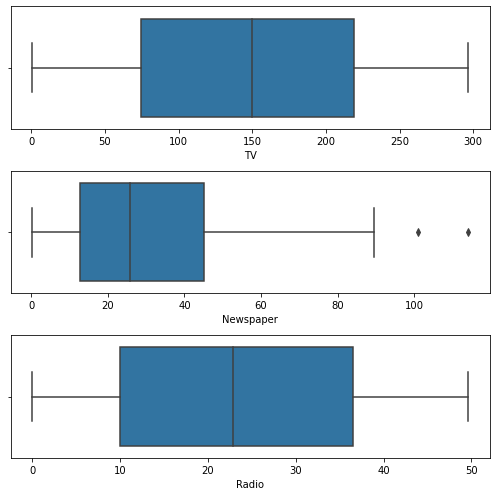

In [22]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (7,7))
plt1 = sns.boxplot(x = df['TV'], ax = axs[0])
plt2 = sns.boxplot(x = df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(x = df['Radio'], ax = axs[2])
plt.tight_layout()

In [23]:
# There are no outliers present in the data

# 4) Model Building

#### We use simplelinear regression here as I have interested to estimate the relationship between quantative variables. The goal of is to adjust the values of the model's parameters to find the line or curve that comes closest to your data.

### Simple Linear Regression

Equation of linear regression

y = c + m1x1 + m2x2 + ... + mnxn

y is the response

c is the intercept

m1 is the coeffiecient value for the first feature

mn is the coefficient value for the nth feature

In our case, 

the equation of regression is: 

y = c + m1 * TV

The m values are the model coefficient or model parameters

In [24]:
x = df['TV']

In [25]:
y = df['Sales']

### Train and test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [27]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [28]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

### Buidling a linear model

In [29]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [30]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [31]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           1.52e-52
Time:                        22:02:17   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Some key statistics from the summary

1. The coefficient for TV is 0.0545, with a very low p value

   The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816

   Meaning that 81.6% of the variance in Sales is explained by TV

   This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
  
   Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

From the parameters that we get, our linear regression equation becomes:

Sales = 6.9487 + 0.0545 * TV

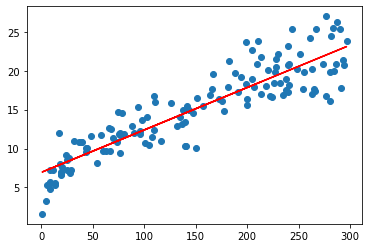

In [32]:
plt.scatter(X_train, y_train)
plt.plot(X_train , 6.9487 + 0.0545 * X_train, 'r')
plt.show()

### Model Evaluation

#### Residual Analysis

In [33]:
y_train_pred = lr.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [34]:
res = (y_train - y_train_pred)

In [35]:
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

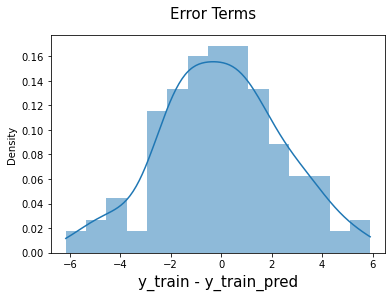

In [36]:
fig = plt.figure()
sns.histplot(res, bins = 15, kde=True, stat="density", linewidth=0)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [37]:
# The residuals are following the normally distributed with a mean 0. All good!

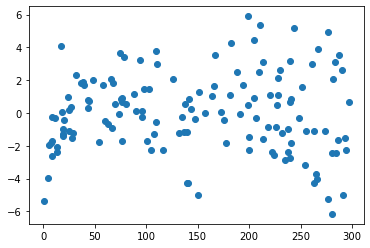

In [38]:
plt.scatter(X_train,res)
plt.show()

### Predictions on the Test Set

In [39]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [40]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [41]:
# Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966233

In [42]:
# Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245658

In [43]:
# R² of 0.79 is generally a positive indicator of your model's ability to explain the variability in the dependent variable

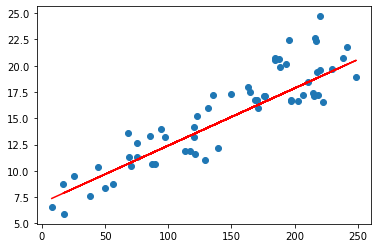

In [44]:
# Visualize the fit on test set
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9487 + 0.0545 * X_test, 'r')
plt.show()

# THANKS!